In [15]:
#learn and use ML
import tensorflow as tf
#loading datas from mnist
mnist=tf.keras.datasets.mnist

In [16]:
#load_data() returns two tuples of numpy arrays, the first tuple represents the training x-y pairs
#while the second tuple represents the test x-y pairs.
(x_train,y_train),(x_test,y_test)=mnist.load_data()
#x_train=x_train/255.0 x_test=x_test/255.0
x_train,x_test=x_train/255.0,x_test/255.0

In [5]:
#create model
#sequential is for linear stack of layers.
model=tf.keras.models.Sequential([
    #
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10,activation=tf.nn.softmax)
])

In [6]:
#complie model
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [7]:
#fit the model
#training epochs=>rotation number
model.fit(x_train,y_train,epochs=5)

Epoch 1/5
60000/60000 [==============================] - 13s 222us/step - loss: 0.2181 - acc: 0.9351
Epoch 2/5
60000/60000 [==============================] - 13s 218us/step - loss: 0.0958 - acc: 0.9709
Epoch 3/5
60000/60000 [==============================] - 13s 215us/step - loss: 0.0689 - acc: 0.9795
Epoch 4/5
60000/60000 [==============================] - 13s 217us/step - loss: 0.0532 - acc: 0.9831
Epoch 5/5
60000/60000 [==============================] - 13s 220us/step - loss: 0.0427 - acc: 0.9861


In [13]:
#evaluate model
model.evaluate(x_test,y_test)

10000/10000 [==============================] - 0s 41us/step


[0.06321836526404367, 0.9808]

In [1]:
#Basic classification
#TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

#Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.9.0


In [2]:
fashion_mnist=keras.datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()

4423680/4422102 [==============================] - 8s 2us/step


In [16]:
class_names=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [5]:
#explore the data before training the model.
train_images.shape

(60000, 28, 28)

In [6]:
len(train_labels)

60000

In [7]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [8]:
test_images.shape

(10000, 28, 28)

In [9]:
len(test_labels)

10000

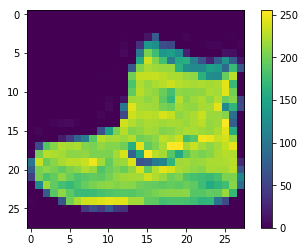

In [10]:
#Preprocess the data before training the network.
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)

In [11]:
#we scale these values to a range of 0 to 1 before feeding to the neural network model.
train_images=train_images/255.0
test_images=test_images/255.0

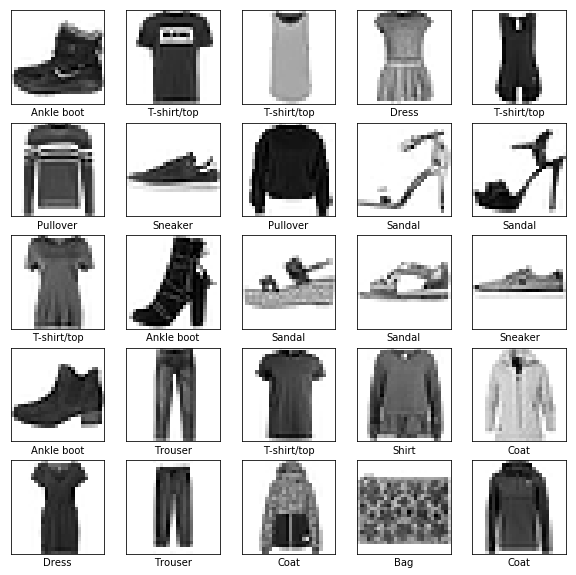

In [23]:
#Display the first 25images from the training set and class name below each image.
plt.figure(figsize=(10,10)) #width, height in inches.
for i in range(25):
    #the subplot will take the index position on a grid with nrows rows and ncols columns. index starts at 1 in the upper left corner and increases to the right.
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

In [25]:
#Build the model
#Setup the layers
#The basic building block of a neural network is the layer.
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation=tf.nn.relu),
    keras.layers.Dense(10,activation=tf.nn.softmax)
])
#the first layer in this network, tf.keras.layers.Flatten, transfroms the format of the images from a 2d-array to 1d-array.
#rest layers are densely-connected, or fully-connected, neural layers. 128nodes(or neurons), 10node softmax.
#returns an array of 10 probability scores that sum to 1.

In [26]:
#Compile the model
#Loss function-This measures how accurate the model is during training. we want to minimize this funcion to "steer" the model
#Optimizer-This is how the model is updated based on the data it sess and its los functino.
#Metrics-Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.
model.compile(optimizer=tf.train.AdamOptimizer(),
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [28]:
#Train the model
#1.Feed the training data to the model
#2.The model learns to associate images and labels.
#3.We ask the model to malke predictions about a test set
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 3s 47us/step - loss: 0.4959 - acc: 0.8253
Epoch 2/5
60000/60000 [==============================] - 3s 43us/step - loss: 0.3749 - acc: 0.8643
Epoch 3/5
60000/60000 [==============================] - 2s 40us/step - loss: 0.3380 - acc: 0.8772
Epoch 4/5
60000/60000 [==============================] - 2s 37us/step - loss: 0.3137 - acc: 0.8854
Epoch 5/5
60000/60000 [==============================] - 2s 36us/step - loss: 0.2979 - acc: 0.8906


In [31]:
#Evaluate accuracy
test_loss,test_acc=model.evaluate(test_images,test_labels)
print('Test accuracy:',test_acc)
#overfitting is when a machine learning model performs worse on new data than on their training data.

10000/10000 [==============================] - 0s 17us/step
Test accuracy: 0.8686


In [32]:
#Make predictions
predictions=model.predict(test_images)
predictions[0]

array([8.27193887e-08, 3.60982777e-09, 8.46341948e-08, 1.11831206e-07,
       3.68350648e-08, 2.37682689e-04, 5.19019181e-07, 9.40979868e-02,
       1.09293842e-06, 9.05662358e-01], dtype=float32)

In [33]:
np.argmax(predictions[0])

9

In [34]:
test_labels[0]

9

In [39]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
  
    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
  
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)
    
def plot_value_array(i,predictions_array,true_label):
    predictions_array,true_label=predictions_array[i],true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot=plt.bar(range(10),predictions_array,color="#777777")
    plt.ylim([0,1])
    predicted_label=np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

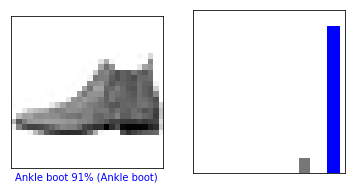

In [40]:
i=0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions,test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions,test_labels)

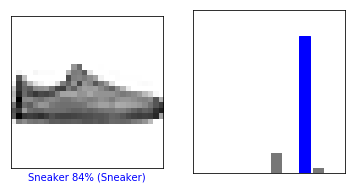

In [41]:
i=12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions,test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions,test_labels)

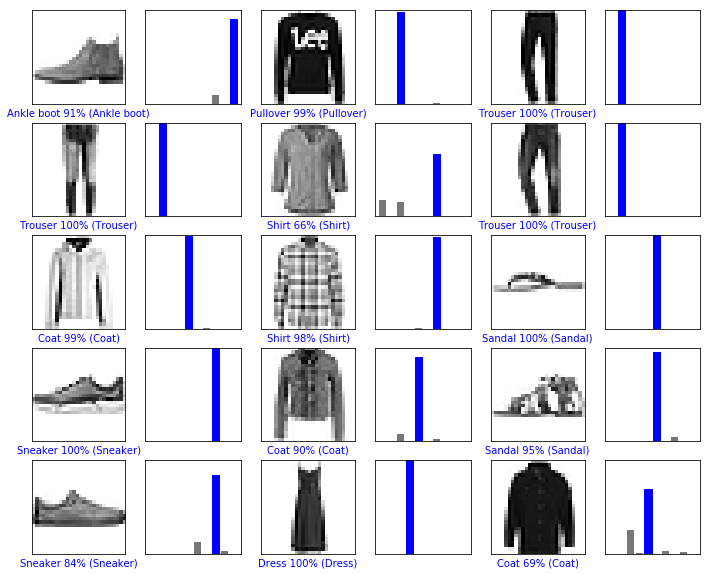

In [42]:
#Plot the first X test images, their predicted label, and the true label
#Color correct predictions in blue, incorrect predictions in red
num_rows=5
num_cols=3
num_images=num_rows*num_cols
plt.figure(figsize=(2*2*num_cols,2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows,2*num_cols,2*i+1)
    plot_image(i,predictions,test_labels,test_images)
    plt.subplot(num_rows,2*num_cols,2*i+2)
    plot_value_array(i,predictions,test_labels)

In [44]:
#Grab an images from the test dataset
img=test_images[0]
print(img.shape)

(28, 28)


In [45]:
#tf.keras models are optimized to make perdictions on a batch, or collection, of examples at once.
#Add the image  to a batch where it's the only member.
img=(np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [47]:
predictions_single=model.predict(img)
print(predictions_single)

[[8.2719382e-08 3.6098342e-09 8.4634024e-08 1.1183140e-07 3.6835058e-08
  2.3768266e-04 5.1901912e-07 9.4098158e-02 1.0929383e-06 9.0566224e-01]]


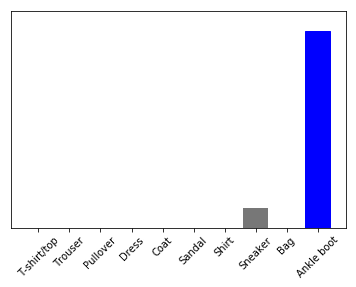

In [48]:
plot_value_array(0,predictions_single,test_labels)
_=plt.xticks(range(10),class_names,rotation=45)

In [1]:
np.argmax(predictions_single[0])

NameError: name 'np' is not defined

In [2]:
#Text clssification with movie review
import tensorflow as tf
from tensorflow import keras

import numpy as np
print(tf.__version__)

1.9.0


In [17]:
#Download the IMDB dataset
imdb=keras.datasets.imdb
(train_data,train_labels),(test_data,test_labels)=imdb.load_data(num_words=10000)

In [19]:
#Explore the data
print("Training entries:{}, labels: {}".format(len(train_data),len(train_labels)))

Training entries:25000, labels: 25000


In [20]:
#the text of reviews have been converted to integers, where each integer represents a specific word in a dictionary.
print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [21]:
len(train_data[0]),len(train_data[1])

(218, 189)

In [22]:
#Convert the integers back to words
#A dictionary mapping words to an integer index
word_index=imdb.get_word_index()

#The first indices are reserved
#Dictionaries have a method called items that returns a list of tuples, where each tuple is a key-value pair
word_index={k:(v+3) for k,v in word_index.items()}
word_index["<PAD>"]=0
word_index["<START>"]=1
word_index["<UNK>"]=2 #unknown
word_index["<UNUSED>"]=3

reverse_word_index=dict([(value,key) for (key,value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i,'?') for i in text])

In [23]:
decode_review(train_data[0])

"<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for wh

In [24]:
#Prepare the data
#the reviews ust be converted to tensors before fed into the neural network.
#One-hot-encode the arrays to convert them into vectors of 0s and 1s.
#Since the movie reviews must be the smae length, we will use the pad_sequences function to standardize the lengths
train_data=keras.preprocessing.sequence.pad_sequences(train_data,
                                                     value=word_index["<PAD>"],
                                                     padding='post',
                                                     maxlen=256)
test_data=keras.preprocessing.sequence.pad_sequences(test_data,
                                                    value=word_index["<PAD>"],
                                                    padding='post',
                                                    maxlen=256)

In [25]:
len(train_data[0]),len(train_data[1])

(256, 256)

In [26]:
print(train_data[0])

[   1   14   22   16   43  530  973 1622 1385   65  458 4468   66 3941
    4  173   36  256    5   25  100   43  838  112   50  670    2    9
   35  480  284    5  150    4  172  112  167    2  336  385   39    4
  172 4536 1111   17  546   38   13  447    4  192   50   16    6  147
 2025   19   14   22    4 1920 4613  469    4   22   71   87   12   16
   43  530   38   76   15   13 1247    4   22   17  515   17   12   16
  626   18    2    5   62  386   12    8  316    8  106    5    4 2223
 5244   16  480   66 3785   33    4  130   12   16   38  619    5   25
  124   51   36  135   48   25 1415   33    6   22   12  215   28   77
   52    5   14  407   16   82    2    8    4  107  117 5952   15  256
    4    2    7 3766    5  723   36   71   43  530  476   26  400  317
   46    7    4    2 1029   13  104   88    4  381   15  297   98   32
 2071   56   26  141    6  194 7486   18    4  226   22   21  134  476
   26  480    5  144   30 5535   18   51   36   28  224   92   25  104
    4 

In [27]:
#Build the model
#How many layers to use in the model?
#How many hidden units to use for each layer?
#input shape is the vocabulary count used for the movie reviews(10,000 words)
vocab_size=10000
model=keras.Sequential()
#Embedding layer takes the integer-encoded vocabulary and looks up the embedding vector for each word-index.
#These vectors are learned as the model trains.
#The vectors add a dimension to the output array.
#The resulting dimensions are (batch, sequence, embedding)
model.add(keras.layers.Embedding(vocab_size,16))
#GlobalAveragePooling1D returns a fixed-length output vector for each example by averaging over the sequence dimension.
#This allows the model to handle input of variable length, in the simplest way possible.
model.add(keras.layers.GlobalAveragePooling1D())
#This fixed-length output vector is piped through a fully-connected(Dens) layer with 16hidden units.
model.add(keras.layers.Dense(16,activation=tf.nn.relu))
#The last layer is densely connected with a single output node. Using the sigmoid activation functino, this value is a float between 0 and 1 or confidence level.
model.add(keras.layers.Dense(1,activation=tf.nn.sigmoid))

model. summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d_1 ( (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


In [28]:
#Hidden units
#The amount of freedom the network is allowed when learning an internal representation.
#Loss function and optimizer
#binary_crossentropy is better for dealing with probabilities.
model.compile(optimizer=tf.train.AdamOptimizer(),
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [29]:
#Create a validation set
#Create a validation set by setting apart 10,000 examples from the original training data.
x_val=train_data[:10000]
partial_x_train=train_data[10000:]

y_val=train_labels[:10000]
partial_y_train=train_labels[10000:]

In [33]:
#Train the model
#40epochs in mini-batches of 512samples.
history=model.fit(partial_x_train,
                 partial_y_train,
                 epochs=40,
                 batch_size=512,
                 validation_data=(x_val,y_val),
                 verbose=1)

Train on 15000 samples, validate on 10000 samples
Epoch 1/40
15000/15000 [==============================] - 1s 75us/step - loss: 0.6934 - acc: 0.5042 - val_loss: 0.6917 - val_acc: 0.5229
Epoch 2/40
15000/15000 [==============================] - 1s 58us/step - loss: 0.6894 - acc: 0.5531 - val_loss: 0.6881 - val_acc: 0.5795
Epoch 3/40
15000/15000 [==============================] - 1s 58us/step - loss: 0.6858 - acc: 0.6010 - val_loss: 0.6850 - val_acc: 0.6246
Epoch 4/40
15000/15000 [==============================] - 1s 57us/step - loss: 0.6817 - acc: 0.6443 - val_loss: 0.6822 - val_acc: 0.5428
Epoch 5/40
15000/15000 [==============================] - 1s 56us/step - loss: 0.6769 - acc: 0.6702 - val_loss: 0.6758 - val_acc: 0.6890
Epoch 6/40
15000/15000 [==============================] - 1s 57us/step - loss: 0.6703 - acc: 0.7137 - val_loss: 0.6689 - val_acc: 0.7067
Epoch 7/40
15000/15000 [==============================] - 1s 56us/step - loss: 0.6616 - acc: 0.7308 - val_loss: 0.6602 - val_acc

In [30]:
#Evaluate the model
results = model.evaluate(test_data, test_labels)
print(results)

25000/25000 [==============================] - 0s 19us/step
[0.7002674054145813, 0.5]


In [31]:
#Create a graph of accuracy and loss over time
#model.fit() returns a History object that contains a dictionary with everything that happened during training.
history_dict=history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

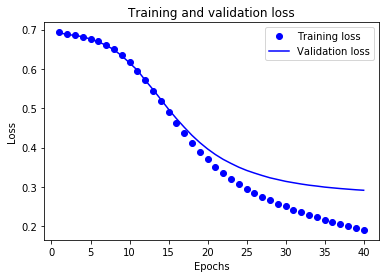

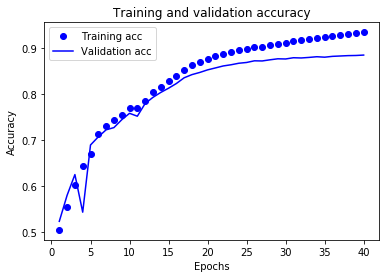

In [35]:
import matplotlib.pyplot as plt
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(1,len(acc)+1)

#"bo" is for "blue dot"
plt.plot(epochs,loss,'bo',label='Training loss')
#b is for "solid blue line"
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

plt.clf() #clear figure
acc_values=history_dict['acc']
val_acc_values=history_dict['val_acc']

plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()
#This is an example of overfitting.After this point, the model over-optimizes and learns representations specific to the training data that do not generalize to test data.
#We could prevent overfitting by simply stopping the training after twenty or so epochs.

In [38]:
#Predict house prices:regression.
#We aim to predict the ouput of a contnuous value, like a price or a probability.
#Contrast this with a classfication problem., where we aim to predict a discrete label.
from __future__ import absolute_import,division,print_function

import tensorflow as tf
from tensorflow import keras
import numpy as np
print(tf.__version__)

1.9.0


In [41]:
#The Boston Housing Prices dataset
boston_housing=keras.datasets.boston_housing
(train_data,train_labels),(test_data,test_labels)=boston_housing.load_data()

#Shuffle the training set
order=np.argsort(np.random.random(train_labels.shape))
train_data=train_data[order]
train_labels=train_labels[order]

In [42]:
#Examples and features
print("Training set:{}",format(train_data.shape)) #404 examples, 13features
print("Testing set:{}",format(test_data.shape)) #102 examples, 13features

Training set:{} (404, 13)
Testing set:{} (102, 13)


In [43]:
#1.Per capita crime rate.
#2.The proportion of residential land zoned for lots over 25,000 square feet.
#3.The proportion of non-retail business acres per town.
#4.Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
#5.Nitric oxides concentration (parts per 10 million).
#6.The average number of rooms per dwelling.
#7.The proportion of owner-occupied units built before 1940.
#8.Weighted distances to five Boston employment centers.
#9.Index of accessibility to radial highways.
#10.Full-value property-tax rate per $10,000.
#11.Pupil-teacher ratio by town.
#12.1000 * (Bk - 0.63) ** 2 where Bk is the proportion of Black people by town.
#13.Percentage lower status of the population.
#Each one of tese input data features is sotred using a different scale.
#This is often the case with real-world data, and understanding how to explore and clean such data is an important skill to develop.

In [44]:
print(train_data[0]) #Display sample features, notice the different scales

[7.8750e-02 4.5000e+01 3.4400e+00 0.0000e+00 4.3700e-01 6.7820e+00
 4.1100e+01 3.7886e+00 5.0000e+00 3.9800e+02 1.5200e+01 3.9387e+02
 6.6800e+00]


In [46]:
#Use the pandas library to display the first few rows of the dataset in a nicely formatted table
import pandas as pd
column_names=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']
df=pd.DataFrame(train_data,columns=column_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.07875,45.0,3.44,0.0,0.437,6.782,41.1,3.7886,5.0,398.0,15.2,393.87,6.68
1,4.55587,0.0,18.10,0.0,0.718,3.561,87.9,1.6132,24.0,666.0,20.2,354.70,7.12
2,0.09604,40.0,6.41,0.0,0.447,6.854,42.8,4.2673,4.0,254.0,17.6,396.90,2.98
3,0.01870,85.0,4.15,0.0,0.429,6.516,27.7,8.5353,4.0,351.0,17.9,392.43,6.36
4,0.52693,0.0,6.20,0.0,0.504,8.725,83.0,2.8944,8.0,307.0,17.4,382.00,4.63


In [47]:
#Labels
print(train_labels[0:10]) #Display first 10 entries

[32.  27.5 32.  23.1 50.  20.6 22.6 36.2 21.8 19.5]


In [49]:
#Normalize features
#It's recommended to normalize features that use different scales and ranges.
#For each feature, subtract the mean of the feature and divide by the standard deviation.
#Test data is *not* used when calculating the mean and std
mean=train_data.mean(axis=0)
std=train_data.std(axis=0)
train_data=(train_data-mean)/std
test_data=(test_data-mean)/std

print(train_data[0]) #First training sample, normalized
#Although the model might converge without feature normalization, it makes training more difficult,
#and it makes the resulting model more dependent on the choice of units used in the input.

[-0.39725269  1.41205707 -1.12664623 -0.25683275 -1.027385    0.72635358
 -1.00016413  0.02383449 -0.51114231 -0.04753316 -1.49067405  0.41584124
 -0.83648691]


In [53]:
#Create the model
def build_model():
    model=keras.Sequential([
        keras.layers.Dense(64,activation=tf.nn.relu,input_shape=(train_data.shape[1],)),
        keras.layers.Dense(64,activation=tf.nn.relu),
        keras.layers.Dense(1)
    ])
    optimizer=tf.train.RMSPropOptimizer(0.001)
    
    model.compile(loss='mse',
                 optimizer=optimizer,
                 metrics=['mae'])
    return model

model=build_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 64)                896       
_________________________________________________________________
dense_8 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


In [54]:
#Train the model
#Display training progress by printing a single dot for each completed epoch
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs):
        if epoch%100==0:print('')
        print(',',end='')
        
EPOCHS=500

#Store training stats
history=model.fit(train_data,train_labels,epochs=EPOCHS,
                 validation_split=0.2, verbose=0,
                 callbacks=[PrintDot()])


,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,

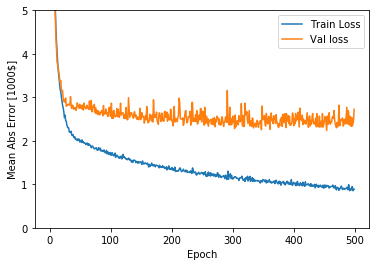

In [56]:
import matplotlib.pyplot as plt

def plot_history(history):
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [1000$]')
    plt.plot(history.epoch, np.array(history.history['mean_absolute_error']),label='Train Loss')
    plt.plot(history.epoch, np.array(history.history['val_mean_absolute_error']),label='Val loss')
    plt.legend()
    plt.ylim([0,5])
    
plot_history(history)


,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,

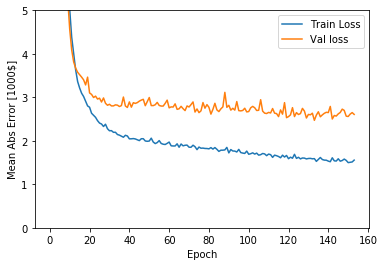

In [57]:
#Let's update the model.fit method to automatically stop training when the validation score doesn't improve.
#We'll use a callback that tests a trainiing condition for every epoch.
model=build_model()

#The patience parameter is the amount of epochs to check for improvement
early_stop=keras.callbacks.EarlyStopping(monitor='val_loss',patience=20)

history=model.fit(train_data,train_labels,epochs=EPOCHS,
                 validation_split=0.2, verbose=0,
                 callbacks=[early_stop,PrintDot()])

plot_history(history)

In [59]:
[loss, mae]=model.evaluate(test_data,test_labels, verbose=0)
print("Testing set Mean Abs Error: ${:7.2f}".format(mae*1000))

Testing set Mean Abs Error: $2668.22


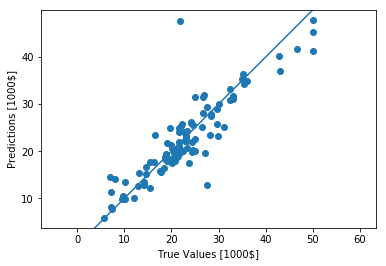

In [61]:
#Predict
test_predictions=model.predict(test_data).flatten()

plt.scatter(test_labels,test_predictions)
plt.xlabel('True Values [1000$]')
plt.ylabel('Predictions [1000$]')
plt.axis('equal')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
_=plt.plot([-100,100],[-100,100])

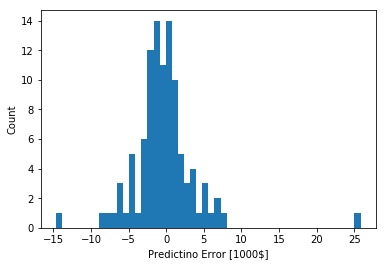

In [62]:
error=test_predictions-test_labels
plt.hist(error,bins=50)
plt.xlabel("Predictino Error [1000$]")
_=plt.ylabel("Count")

In [64]:
#Conclusion
#Mean Squared Error(MSE) is a common loss function used for regression problems
#Similarly, evaluation metrics used for regression differ from classification. A coom regression metric is Mean Absolute Error(MAE).
#When input data features have values with different ranges, each feature should be scaled independently.
#If there is not much training data, prefer a small network with few hidden layers to avoud overfitting.
#Early stopping is a useful technique to prevent overfitting.

In [65]:
#Exploring overfitting and underfitting
#our model would overfit to the training data.
#The opposite of overfitting is underfitting. Underfitting occurs when there is still room for improvement on the test data.
#If the model is not powerful enough, is over-regularized, or has simply not been trained long enough.
#To prevent overfitting, the best solution is to use more training data. 
#The next best solution is to use techniques like regularization.
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.9.0


In [68]:
#Download the IMDB dataset
NUM_WORDS=10000
(train_data,train_labels),(test_data,test_labels)=keras.datasets.imdb.load_data(num_words=NUM_WORDS)

def multi_hot_sequences(sequences, dimension):
    #Create an all-zero matrix of shape(len(sequences),dimension)
    results=np.zeros((len(sequences),dimension))
    for i, word_indices in enumerate(sequences):
        results[i,word_indices]=1.0 #set specific indices of results[i] to 1s
    return results

train_data=multi_hot_sequences(train_data,dimension=NUM_WORDS)
test_data=multi_hot_sequences(test_data,dimension=NUM_WORDS)

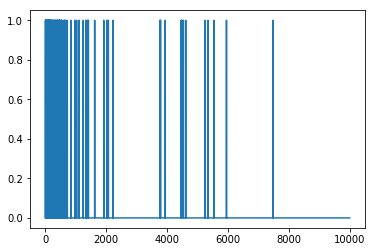

In [69]:
plt.plot(train_data[0])

In [71]:
#Demonstrate overfitting
#The simplest way to prevent overfitting is to reduce the size of the model, the number of learnable parameters in the model.
#To find an appropriate model size, it's best to start with relatively few layers and parameters, 
#then begin increasing the size of the layers or adding new layers until you see diminishing returns on the validation loss.
baseline_model=keras.Sequential([
    #'input_shape' is only requeired here so that '.summary' works.
    keras.layers.Dense(16,activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16,activation=tf.nn.relu),
    keras.layers.Dense(1,activation=tf.nn.sigmoid)
])
baseline_model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy','binary_crossentropy'])
baseline_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 16)                160016    
_________________________________________________________________
dense_17 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [72]:
baseline_history=baseline_model.fit(train_data,train_labels,
                                   epochs=20,batch_size=512,
                                   validation_data=(test_data,test_labels),
                                   verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 5s - loss: 0.4979 - acc: 0.7940 - binary_crossentropy: 0.4979 - val_loss: 0.3512 - val_acc: 0.8782 - val_binary_crossentropy: 0.3512
Epoch 2/20
 - 4s - loss: 0.2597 - acc: 0.9114 - binary_crossentropy: 0.2597 - val_loss: 0.2876 - val_acc: 0.8878 - val_binary_crossentropy: 0.2876
Epoch 3/20
 - 4s - loss: 0.1901 - acc: 0.9349 - binary_crossentropy: 0.1901 - val_loss: 0.2860 - val_acc: 0.8868 - val_binary_crossentropy: 0.2860
Epoch 4/20
 - 4s - loss: 0.1524 - acc: 0.9493 - binary_crossentropy: 0.1524 - val_loss: 0.3059 - val_acc: 0.8802 - val_binary_crossentropy: 0.3059
Epoch 5/20
 - 4s - loss: 0.1268 - acc: 0.9585 - binary_crossentropy: 0.1268 - val_loss: 0.3290 - val_acc: 0.8771 - val_binary_crossentropy: 0.3290
Epoch 6/20
 - 4s - loss: 0.1060 - acc: 0.9669 - binary_crossentropy: 0.1060 - val_loss: 0.3550 - val_acc: 0.8727 - val_binary_crossentropy: 0.3550
Epoch 7/20
 - 4s - loss: 0.0896 - acc: 0.9733 - binary_crossentropy:

In [73]:
#Create a smaller model
smaller_model=keras.Sequential([
    #'input_shape' is only requeired here so that '.summary' works.
    keras.layers.Dense(4,activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(4,activation=tf.nn.relu),
    keras.layers.Dense(1,activation=tf.nn.sigmoid)
])
smaller_model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy','binary_crossentropy'])
smaller_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 4)                 40004     
_________________________________________________________________
dense_20 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 5         
Total params: 40,029
Trainable params: 40,029
Non-trainable params: 0
_________________________________________________________________


In [74]:
smaller_history=smaller_model.fit(train_data,train_labels,
                                 epochs=20,batch_size=512,
                                 validation_data=(test_data,test_labels),
                                 verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 5s - loss: 0.5853 - acc: 0.7403 - binary_crossentropy: 0.5853 - val_loss: 0.4896 - val_acc: 0.8417 - val_binary_crossentropy: 0.4896
Epoch 2/20
 - 4s - loss: 0.3992 - acc: 0.8883 - binary_crossentropy: 0.3992 - val_loss: 0.3740 - val_acc: 0.8819 - val_binary_crossentropy: 0.3740
Epoch 3/20
 - 4s - loss: 0.2957 - acc: 0.9148 - binary_crossentropy: 0.2957 - val_loss: 0.3182 - val_acc: 0.8873 - val_binary_crossentropy: 0.3182
Epoch 4/20
 - 4s - loss: 0.2382 - acc: 0.9276 - binary_crossentropy: 0.2382 - val_loss: 0.2957 - val_acc: 0.8870 - val_binary_crossentropy: 0.2957
Epoch 5/20
 - 4s - loss: 0.2028 - acc: 0.9368 - binary_crossentropy: 0.2028 - val_loss: 0.2891 - val_acc: 0.8854 - val_binary_crossentropy: 0.2891
Epoch 6/20
 - 4s - loss: 0.1778 - acc: 0.9437 - binary_crossentropy: 0.1778 - val_loss: 0.2858 - val_acc: 0.8867 - val_binary_crossentropy: 0.2858
Epoch 7/20
 - 4s - loss: 0.1586 - acc: 0.9515 - binary_crossentropy:

In [75]:
#Create a bigger model
bigger_model=keras.Sequential([
    #'input_shape' is only requeired here so that '.summary' works.
    keras.layers.Dense(512,activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(512,activation=tf.nn.relu),
    keras.layers.Dense(1,activation=tf.nn.sigmoid)
])
bigger_model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy','binary_crossentropy'])
bigger_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 512)               5120512   
_________________________________________________________________
dense_23 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 513       
Total params: 5,383,681
Trainable params: 5,383,681
Non-trainable params: 0
_________________________________________________________________


In [76]:
bigger_history=bigger_model.fit(train_data,train_labels,
                               epochs=20,batch_size=512,
                               validation_data=(test_data,test_labels),
                               verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 16s - loss: 0.3408 - acc: 0.8544 - binary_crossentropy: 0.3408 - val_loss: 0.2950 - val_acc: 0.8804 - val_binary_crossentropy: 0.2950
Epoch 2/20
 - 15s - loss: 0.1363 - acc: 0.9506 - binary_crossentropy: 0.1363 - val_loss: 0.3649 - val_acc: 0.8614 - val_binary_crossentropy: 0.3649
Epoch 3/20
 - 15s - loss: 0.0460 - acc: 0.9868 - binary_crossentropy: 0.0460 - val_loss: 0.4292 - val_acc: 0.8681 - val_binary_crossentropy: 0.4292
Epoch 4/20
 - 15s - loss: 0.0072 - acc: 0.9990 - binary_crossentropy: 0.0072 - val_loss: 0.6098 - val_acc: 0.8698 - val_binary_crossentropy: 0.6098
Epoch 5/20
 - 15s - loss: 9.2951e-04 - acc: 1.0000 - binary_crossentropy: 9.2951e-04 - val_loss: 0.7045 - val_acc: 0.8699 - val_binary_crossentropy: 0.7045
Epoch 6/20
 - 15s - loss: 6.7971e-04 - acc: 1.0000 - binary_crossentropy: 6.7971e-04 - val_loss: 0.7418 - val_acc: 0.8696 - val_binary_crossentropy: 0.7418
Epoch 7/20
 - 15s - loss: 1.3107e-04 - acc: 1.

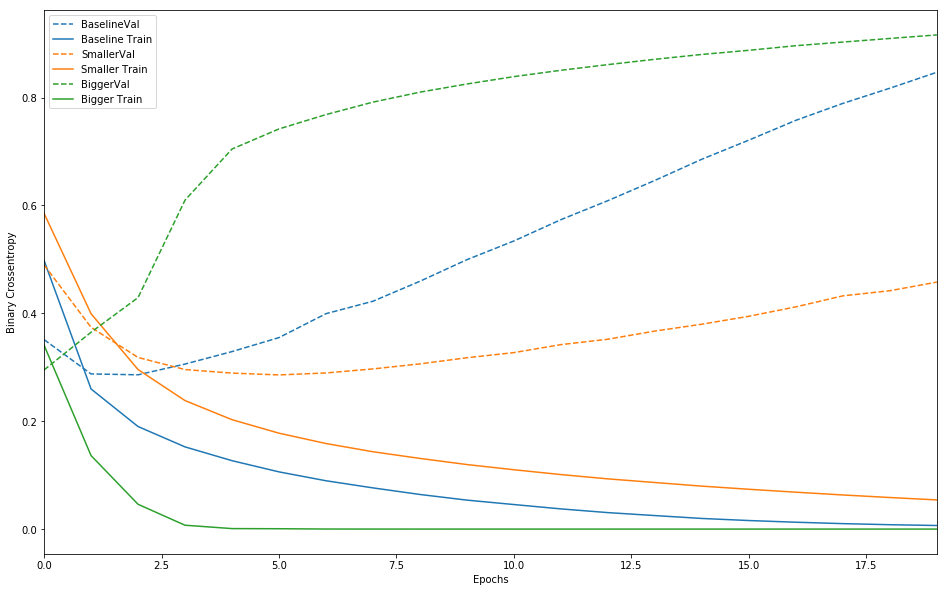

In [79]:
#Plot the training and validation loss
def plot_history(histories,key='binary_crossentropy'):
    plt.figure(figsize=(16,10))
    
    for name,history in histories:
        val=plt.plot(history.epoch,history.history['val_'+key],
                    '--',label=name.title()+'Val')
        plt.plot(history.epoch,history.history[key],color=val[0].get_color(),
                label=name.title()+' Train')
        
    plt.xlabel('Epochs')
    plt.ylabel(key.replace('_',' ').title())
    plt.legend()
        
    plt.xlim([0,max(history.epoch)])
        
plot_history([('baseline',baseline_history),
            ('smaller',smaller_history),
            ('bigger',bigger_history)])
#Notice that the larger network begins overfitting almost right away, after just one epoch, and overffits much more severely.
#The more capacity the network has, the quicker it will be able to model the training data
#,but the more susceptible it is to overfitting.

In [81]:
#Strategoes
#Add weogjt regularization.
#given some training data and a network architecture, there are multiple sets of weights values that could explain the data,
#and simpler models are less likely to overfit than complex ones.
#A simple model in this context  is a model where the ditribution of parameter values has less entropy.
#Thus a common way to mitigate overfitting is to put constraints on the complexity of a network by forcing its weights only to take small values,
#which makes the distribution of weight values more "regular".
#This is called "weight regularization", and it is done by adding to the loss functio3n of the network a cost associated with having large weights.
#L1 regularization, where the cost added is proportional to the absolute value of the weights coefficients
#L2 regularization, where the cost added is proportional to the square of the value of the weights coefficients
#also called weight decay in the context of neural networks.
l2_model=keras.Sequential([
    keras.layers.Dense(16,kernel_regularizer=keras.regularizers.l2(0.001),activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16,kernel_regularizer=keras.regularizers.l2(0.001),activation=tf.nn.relu),
    keras.layers.Dense(1,activation=tf.nn.sigmoid)
])
l2_model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy','binary_crossentropy'])
l2_model_history=l2_model.fit(train_data,train_labels,epochs=20, batch_size=512,
                             validation_data=(test_data,test_labels),verbose=2)
#l2(0.001) means that every coefficient in the weight matrix of the layer will add 0.001*weight_coefficient_value**2 to the total loss of the network.
#Note that because this penalty is only added at traininig time, the loss for this network will be much higher at training than at test time.


Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 5s - loss: 0.5168 - acc: 0.8139 - binary_crossentropy: 0.4771 - val_loss: 0.3779 - val_acc: 0.8754 - val_binary_crossentropy: 0.3370
Epoch 2/20
 - 4s - loss: 0.3017 - acc: 0.9091 - binary_crossentropy: 0.2567 - val_loss: 0.3330 - val_acc: 0.8880 - val_binary_crossentropy: 0.2847
Epoch 3/20
 - 4s - loss: 0.2506 - acc: 0.9305 - binary_crossentropy: 0.1998 - val_loss: 0.3361 - val_acc: 0.8870 - val_binary_crossentropy: 0.2835
Epoch 4/20
 - 4s - loss: 0.2263 - acc: 0.9409 - binary_crossentropy: 0.1720 - val_loss: 0.3505 - val_acc: 0.8820 - val_binary_crossentropy: 0.2950
Epoch 5/20
 - 4s - loss: 0.2110 - acc: 0.9482 - binary_crossentropy: 0.1541 - val_loss: 0.3644 - val_acc: 0.8784 - val_binary_crossentropy: 0.3065
Epoch 6/20
 - 4s - loss: 0.2000 - acc: 0.9516 - binary_crossentropy: 0.1412 - val_loss: 0.3802 - val_acc: 0.8748 - val_binary_crossentropy: 0.3208
Epoch 7/20
 - 4s - loss: 0.1908 - acc: 0.9556 - binary_crossentropy:

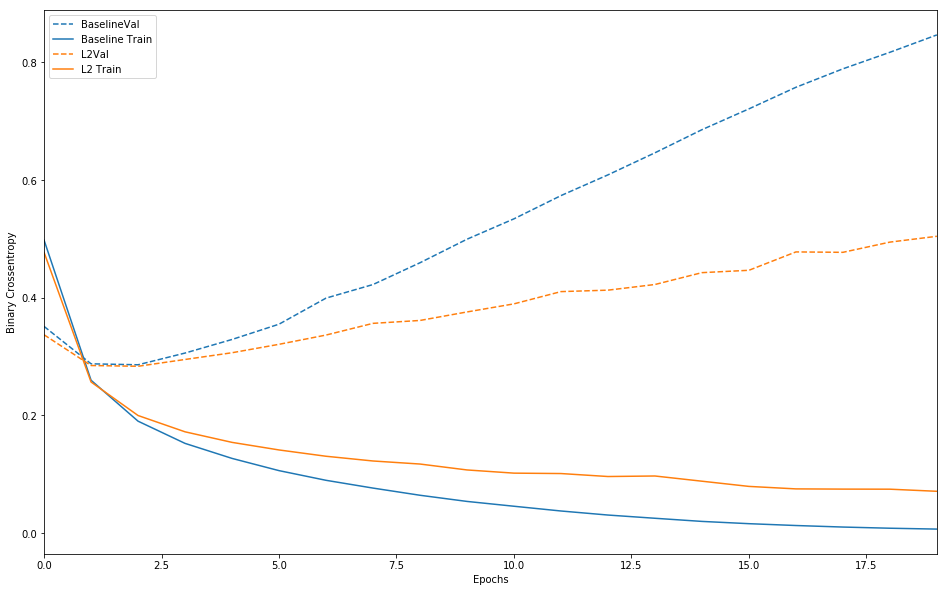

In [83]:
plot_history([('baseline',baseline_history),
             ('l2',l2_model_history)])
#L2 regularized model has become much more resistant to overfitting than the baseline model,
#even though both models have the same number of parameters.

In [85]:
#Add dropout
#Dropout is one of the most effective and most commonly used regularization techniques for neural networks
#Dropout consists of randomly "dropping out"(i.e. set to zero) a number of output features of the layer during training.
#The "dropout rage" is the fraction of the features that are being zeroed-out.
#At test time, no units are dropped out, and instead the layer's output values are scaled down by a factor equal to the dropout rate,
#so as to balance for the fact that more units are active than at training time.
dpt_model=keras.Sequential([
    #'input_shape' is only requeired here so that '.summary' works.
    keras.layers.Dense(16,activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(16,activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1,activation=tf.nn.sigmoid)
])
dpt_model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy','binary_crossentropy'])
dpt_model_history=dpt_model.fit(train_data,train_labels,epochs=20,batch_size=512,
                               validation_data=(test_data,test_labels),verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 5s - loss: 0.6247 - acc: 0.6282 - binary_crossentropy: 0.6247 - val_loss: 0.4687 - val_acc: 0.8493 - val_binary_crossentropy: 0.4687
Epoch 2/20
 - 4s - loss: 0.4582 - acc: 0.7930 - binary_crossentropy: 0.4582 - val_loss: 0.3339 - val_acc: 0.8809 - val_binary_crossentropy: 0.3339
Epoch 3/20
 - 4s - loss: 0.3641 - acc: 0.8520 - binary_crossentropy: 0.3641 - val_loss: 0.2877 - val_acc: 0.8880 - val_binary_crossentropy: 0.2877
Epoch 4/20
 - 4s - loss: 0.2983 - acc: 0.8878 - binary_crossentropy: 0.2983 - val_loss: 0.2745 - val_acc: 0.8887 - val_binary_crossentropy: 0.2745
Epoch 5/20
 - 4s - loss: 0.2573 - acc: 0.9098 - binary_crossentropy: 0.2573 - val_loss: 0.2756 - val_acc: 0.8890 - val_binary_crossentropy: 0.2756
Epoch 6/20
 - 4s - loss: 0.2204 - acc: 0.9258 - binary_crossentropy: 0.2204 - val_loss: 0.2838 - val_acc: 0.8882 - val_binary_crossentropy: 0.2838
Epoch 7/20
 - 4s - loss: 0.1958 - acc: 0.9338 - binary_crossentropy:

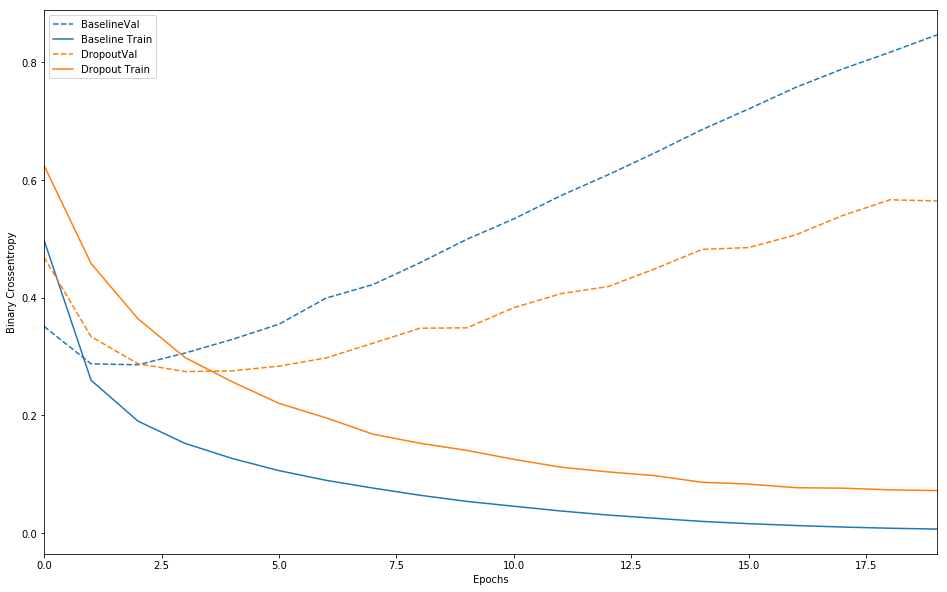

In [87]:
plot_history([('baseline',baseline_history),
             ('dropout',dpt_model_history)])
#To recap
#Get more training data.
#Reduce the capacity of the network.
#Add weight regularization.
#Add dropout.

In [1]:
#Save and resotre models
#most machine learning practitioners share code to create the model, and the trained weights, or parameter, for the model.
from __future__ import absolute_import,division,print_function

import os

import tensorflow as tf
from tensorflow import keras

tf.__version__

'1.12.0'

In [2]:
(train_images,train_labels),(test_images,test_labels)=tf.keras.datasets.mnist.load_data()

train_labels=train_labels[:1000]
test_labels=test_labels[:1000]

train_images=train_images[:1000].reshape(-1,28*28)/255.0
test_images=test_images[:1000].reshape(-1,28*28)/255.0

In [3]:
#Define a model
#Returns a short sequential model
def create_model():
    model=tf.keras.models.Sequential([
        keras.layers.Dense(512,activation=tf.nn.relu,input_shape=(784,)),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(10,activation=tf.nn.softmax)
    ])
    
    model.compile(optimizer=tf.train.AdamOptimizer(),
                 loss=tf.keras.losses.sparse_categorical_crossentropy,
                 metrics=['accuracy'])
    return model

#Create a basic model instance
model=create_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [5]:
#Save checkpoints during training
#This way you can use a trained model without having to retrain it, or pick-up training where you left of.
checkpoint_path="training_1/cp.ckpt"
checkpoint_dir=os.path.dirname(checkpoint_path)

#Create checkpoint callback
cp_callback=tf.keras.callbacks.ModelCheckpoint(checkpoint_path,save_weights_only=True,verbose=1)

model=create_model()
model.fit(train_images,train_labels,epochs=10,validation_data=(test_images,test_labels),callbacks=[cp_callback]) #pass callback to training

Train on 1000 samples, validate on 1000 samples
Epoch 1/10
 640/1000 [==================>...........] - ETA: 1s - loss: 1.4271 - acc: 0.6094  
Epoch 00001: saving model to training_1/cp.ckpt
1000/1000 [==============================] - 3s 3ms/step - loss: 1.1598 - acc: 0.6810 - val_loss: 0.6892 - val_acc: 0.7980
Epoch 2/10
 576/1000 [================>.............] - ETA: 0s - loss: 0.4424 - acc: 0.8733
Epoch 00002: saving model to training_1/cp.ckpt
1000/1000 [==============================] - 0s 189us/step - loss: 0.4243 - acc: 0.8840 - val_loss: 0.5122 - val_acc: 0.8460
Epoch 3/10
 992/1000 [============================>.] - ETA: 0s - loss: 0.2808 - acc: 0.9254
Epoch 00003: saving model to training_1/cp.ckpt
1000/1000 [==============================] - 0s 248us/step - loss: 0.2799 - acc: 0.9260 - val_loss: 0.4720 - val_acc: 0.8480
Epoch 4/10
 608/1000 [=================>............] - ETA: 0s - loss: 0.1994 - acc: 0.9424
Epoch 00004: saving model to training_1/cp.ckpt
1000/1000 [==

In [6]:
#!ls{checkpoint_dir}
#checkpoint cp.ckpt.data~

In [7]:
model=create_model()
loss,acc=model.evaluate(test_images,test_labels)
print("Untrained model, accuracy:{:5.2f}%".format(100*acc))

1000/1000 [==============================] - 0s 304us/step
Untrained model, accuracy: 9.30%


In [8]:
model.load_weights(checkpoint_path)
loss,acc=model.evaluate(test_images,test_labels)
print("Restored model, accuracy:{:5.2f}%".format(100*acc))

1000/1000 [==============================] - 0s 53us/step
Restored model, accuracy:86.80%


In [9]:
#Checkpoint callback options
#include the epoch in the file name. (uses 'str.format')
checkpoint_path="training_2/cp-{epoch:04d}.ckpt"
checkpoint_dir=os.path.dirname(checkpoint_path)

cp_callback=tf.keras.callbacks.ModelCheckpoint(
    checkpoint_path,verbose=1,save_weights_only=True,
    #Save weights, every 5-epochs.
    period=5)

model=create_model()
model.fit(train_images,train_labels,epochs=50,callbacks=[cp_callback],validation_data=(test_images,test_labels),verbose=0)


Epoch 00005: saving model to training_2/cp-0005.ckpt

Epoch 00010: saving model to training_2/cp-0010.ckpt

Epoch 00015: saving model to training_2/cp-0015.ckpt

Epoch 00020: saving model to training_2/cp-0020.ckpt

Epoch 00025: saving model to training_2/cp-0025.ckpt

Epoch 00030: saving model to training_2/cp-0030.ckpt

Epoch 00035: saving model to training_2/cp-0035.ckpt

Epoch 00040: saving model to training_2/cp-0040.ckpt

Epoch 00045: saving model to training_2/cp-0045.ckpt

Epoch 00050: saving model to training_2/cp-0050.ckpt


In [10]:
#!ls{checkpoint_dir}
#checkpoint cp-0030.ckpt.data~

In [11]:
latest=tf.train.latest_checkpoint(checkpoint_dir)
latest
#the default tensorflow format only saves the 5 most recent checkpoints.

'training_2\\cp-0050.ckpt'

In [12]:
model=create_model()
model.load_weights(latest)
loss,acc=model.evaluate(test_images,test_labels)
print("Restored model, accuracy:{:5.2f}%".format(100*acc))

1000/1000 [==============================] - 0s 173us/step
Restored model, accuracy:87.10%


In [13]:
#What are theses files?
#The above code stores the weights to a collection of checkpoint-formatted files that contain only the trained weights in a binary format.
#Checkpoints contain:*One or more shards that contain your model's weights.* An index file that indicates which weights are stored in a which shard.

In [14]:
#Manually save weights
#Save the weights
model.save_weights('./checkpoints/my_checkpoint')

#Restore the weights
model=create_model()
model.load_weights('./checkpoints/my_checkpoint')

loss,acc=model.evaluate(test_images,test_labels)
print("Restored model, accuracy:{:5.2f}%".format(100*acc))

1000/1000 [==============================] - 0s 180us/step
Restored model, accuracy:87.10%


In [15]:
#Save the entire model
#The entire model can be saved to a file that contains the weight values, the model's configuration,
#,and even the optimizer's configuration. This allows you to checkpoint a model and resume training later without access to the original code.
#Saving a fully-functional model is very useful
#As an HDF5 file
model=create_model()

#You need to use a keras.optimizer to restore the optimizer state from an HDF5 file.
model.compile(optimizer=keras.optimizers.Adam(),
             loss=tf.keras.losses.sparse_categorical_crossentropy,
             metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5)

#Save entire model to a HDF5 file
model.save('my_model.h5')

Epoch 1/5
1000/1000 [==============================] - 1s 540us/step - loss: 1.1892 - acc: 0.6660
Epoch 2/5
1000/1000 [==============================] - 0s 127us/step - loss: 0.4143 - acc: 0.8820
Epoch 3/5
1000/1000 [==============================] - 0s 121us/step - loss: 0.2842 - acc: 0.9220
Epoch 4/5
1000/1000 [==============================] - 0s 120us/step - loss: 0.1953 - acc: 0.9530
Epoch 5/5
1000/1000 [==============================] - 0s 125us/step - loss: 0.1489 - acc: 0.9700


In [16]:
#Recreate the exact same model, including weights and optimizer.
new_model=keras.models.load_model('my_model.h5')
new_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_7 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [17]:
loss,acc=new_model.evaluate(test_images,test_labels)
print("Restored model, accuracy:{:5.2f}%".format(100*acc))
#This technique saves everything
#The weight values
#The model's configuration(architecture)
#The optimizer configuration

1000/1000 [==============================] - 0s 197us/step
Restored model, accuracy:86.30%


In [18]:
model=create_model()
model.fit(train_images,train_labels,epochs=5)

Epoch 1/5
1000/1000 [==============================] - 1s 544us/step - loss: 1.1780 - acc: 0.6540
Epoch 2/5
1000/1000 [==============================] - 0s 121us/step - loss: 0.4338 - acc: 0.8730
Epoch 3/5
1000/1000 [==============================] - 0s 113us/step - loss: 0.3026 - acc: 0.9220
Epoch 4/5
1000/1000 [==============================] - 0s 112us/step - loss: 0.2179 - acc: 0.9430
Epoch 5/5
1000/1000 [==============================] - 0s 107us/step - loss: 0.1562 - acc: 0.9690


In [19]:
saved_model_path=tf.contrib.saved_model.save_keras_model(model,"./saved_model")

INFO:tensorflow:Signatures INCLUDED in export for Classify: None
INFO:tensorflow:Signatures INCLUDED in export for Regress: None
INFO:tensorflow:Signatures INCLUDED in export for Predict: None
INFO:tensorflow:Signatures INCLUDED in export for Train: ['train']
INFO:tensorflow:Signatures INCLUDED in export for Eval: None
INFO:tensorflow:No assets to save.
INFO:tensorflow:No assets to write.
INFO:tensorflow:Signatures INCLUDED in export for Classify: None
INFO:tensorflow:Signatures INCLUDED in export for Regress: None
INFO:tensorflow:Signatures INCLUDED in export for Predict: None
INFO:tensorflow:Signatures INCLUDED in export for Train: None
INFO:tensorflow:Signatures INCLUDED in export for Eval: ['eval']
INFO:tensorflow:No assets to save.
INFO:tensorflow:No assets to write.
INFO:tensorflow:Signatures INCLUDED in export for Classify: None
INFO:tensorflow:Signatures INCLUDED in export for Regress: None
INFO:tensorflow:Signatures INCLUDED in export for Predict: ['serving_default']
INFO:tens

In [20]:
#!ls savead_models/
#1542650893~

In [21]:
new_model=tf.contrib.saved_model.load_keras_model(saved_model_path)

In [22]:
#The optimizer was not restored, re-attach a new one.
new_model.compile(optimizer=tf.train.AdamOptimizer(),
                 loss=tf.keras.losses.sparse_categorical_crossentropy,
                 metrics=['accuracy'])

loass,acc=new_model.evaluate(test_images,test_labels)
print("Restored model, accuracy:{:5.2f}%".format(100*acc))

1000/1000 [==============================] - 0s 253us/step
Restored model, accuracy:85.00%
